In [1]:
!pip install numpy scipy scikit-image matplotlib

In [2]:
import torch
from matplotlib import pyplot as plt
import matplotlib.patches as patches

ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math="precision")
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

/opt/conda/lib/python3.10/site-packages/torch/hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /home/jovyan/.cache/torch/hub/torchhub.zip
/home/jovyan/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
 

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Using cache found in /home/jovyan/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [ ]:
ssd_model.to('cuda')
ssd_model.eval()

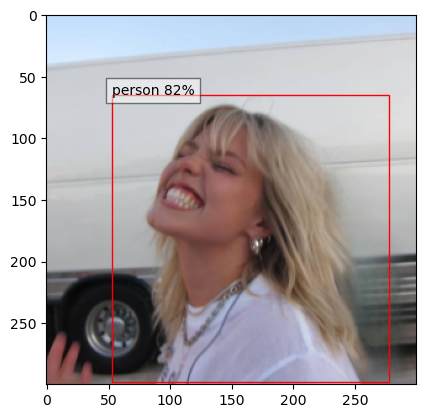

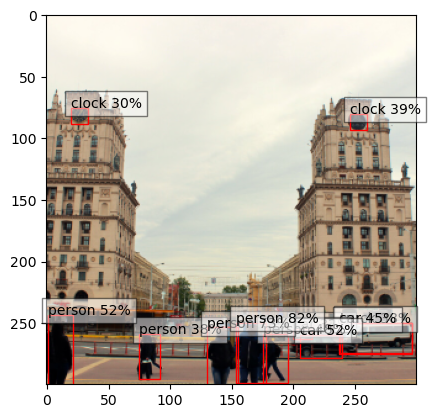

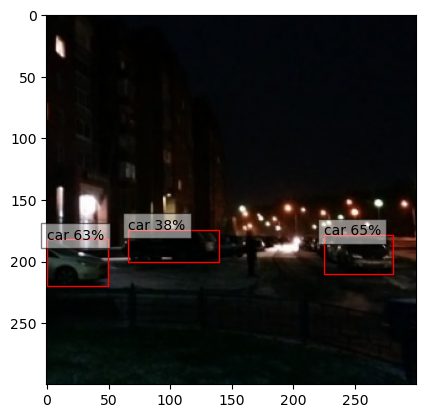

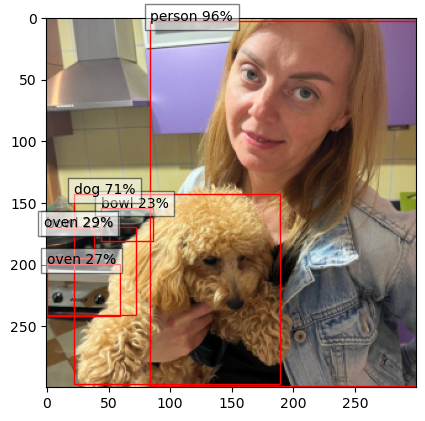

In [4]:
uris = [
    '1.jpg',
    '2.jpg',
    '3.jpg',
    '4.jpg'
]

inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

with torch.no_grad():
    detections_batch = ssd_model(tensor)

results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.20) for results in results_per_input]

classes_to_labels = utils.get_coco_object_dictionary()

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()